In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
pd.set_option('display.max_columns', None) #отображать все столбцы в выдаче
pd.set_option('display.max_colwidth', None) #отображать все символы в ячейках

## Задание 1. Загрузка данных
Изучить представленный набор данных на основе описания его столбцов, загрузить его и оставить 8 столбцов для дальнейшего изучения: surgery?, Age, rectal temperature, pulse, respiratory rate, temperature of extremities, pain, outcome.

In [3]:
#задаем список (list) с названиями столбцов. Названия берем из документации
columns = ['surgery?', 'Age', 'Hospital Number', 'rectal temperature', 'pulse', 'respiratory rate',
          'temperature of extremities', 'peripheral pulse', 'mucous membranes', 'capillary refill time', 'pain',
           'peristalsis', 'abdominal distension', 'nasogastric tube', 'nasogastric reflux', 'nasogastric reflux PH',
          'rectal examination', 'abdomen', 'packed cell volume', 'total protein', 'abdominocentesis appearance',
          'abdomcentesis total protein', 'outcome', 'surgical lesion?', 'type of lesion 1', 'type of lesion 2',
          'type of lesion 3', 'cp_data']
#Читаем файл, который находится в папке с программой 
#Используя na_values сразу заменим показатели с "?" на NaN
df_horse = pd.read_csv('horse_data.csv', header = None, names = columns, na_values = '?')

In [4]:
#Смотрим на первые 5 строк полученного ДФ
df_horse.head()

,surgery?,Age,Hospital Number,rectal temperature,pulse,respiratory rate,temperature of extremities,peripheral pulse,mucous membranes,capillary refill time,pain,peristalsis,abdominal distension,nasogastric tube,nasogastric reflux,nasogastric reflux PH,rectal examination,abdomen,packed cell volume,total protein,abdominocentesis appearance,abdomcentesis total protein,outcome,surgical lesion?,type of lesion 1,type of lesion 2,type of lesion 3,cp_data
0,2.0,1,530101,38.5,66.0,28.0,3.0,3.0,NaN,2.0,5.0,4.0,4.0,NaN,NaN,NaN,3.0,5.0,45.0,8.4,NaN,NaN,2.0,2,11300,0,0,2
1,1.0,1,534817,39.2,88.0,20.0,NaN,NaN,4.0,1.0,3.0,4.0,2.0,NaN,NaN,NaN,4.0,2.0,50.0,85.0,2.0,2.0,3.0,2,2208,0,0,2
2,2.0,1,530334,38.3,40.0,24.0,1.0,1.0,3.0,1.0,3.0,3.0,1.0,NaN,NaN,NaN,1.0,1.0,33.0,6.7,NaN,NaN,1.0,2,0,0,0,1
3,1.0,9,5290409,39.1,164.0,84.0,4.0,1.0,6.0,2.0,2.0,4.0,4.0,1.0,2.0,5.0,3.0,NaN,48.0,7.2,3.0,5.3,2.0,1,2208,0,0,1
4,2.0,1,530255,37.3,104.0,35.0,NaN,NaN,6.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,7.4,NaN,NaN,2.0,2,4300,0,0,2


In [5]:
# Через функцию iloc фильтруем те столбцы, которые нам необходимы по заданию. 
df_horse_reserch = df_horse.iloc[:, [0,1,3,4,5,6,10,22]]
# Выводим 5 строк для проверки
df_horse_reserch.head()

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
0,2.0,1,38.5,66.0,28.0,3.0,5.0,2.0
1,1.0,1,39.2,88.0,20.0,NaN,3.0,3.0
2,2.0,1,38.3,40.0,24.0,1.0,3.0,1.0
3,1.0,9,39.1,164.0,84.0,4.0,2.0,2.0
4,2.0,1,37.3,104.0,35.0,NaN,NaN,2.0


In [6]:
df_horse_reserch.corr()[(df_horse_reserch.corr() > 0.8)]

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
surgery?,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
rectal temperature,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
pulse,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
respiratory rate,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
temperature of extremities,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
pain,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
outcome,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


#### Вывод по заданию 1:
Датафрейм прочитан. На основании документации даны названия всех столбцов. Через новый ДФ выделены только те столбцы, которые потребуются по заданию.
При расчете корреляции видим, что нет никаких сильных связей между данными. 

## Задание 2. Первичное изучение данных
Проанализировать значения по столбцам, рассчитать базовые статистики, найти выбросы.

In [7]:
df_horse_reserch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   surgery?                    299 non-null    float64
 1   Age                         300 non-null    int64  
 2   rectal temperature          240 non-null    float64
 3   pulse                       276 non-null    float64
 4   respiratory rate            242 non-null    float64
 5   temperature of extremities  244 non-null    float64
 6   pain                        245 non-null    float64
 7   outcome                     299 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 18.9 KB


В ДФ нет НаН значений. Вместе с тем, мы видим, что тип всех столбцов, кроме возраста - объекты. 
Из хэда ДФ видим, что в 6-ом и 7-ом столбцах встречаются знаки вопроса. 
Заменим их на НаН и изменим типы данных 

In [8]:
#заменим значения ? на NaN
#df_horse_reserch[df_horse_reserch.iloc[:, :] == '?'] = np.nan
#Не потребовалось - при повторном прохождении по коду использовали na_values при чтении ДФ

In [9]:
#через цикл посмотрим на все уникальные значения каждого отдельного столбца 
for column_name in df_horse_reserch.columns:
    print(df_horse_reserch[column_name].name)
    print(df_horse_reserch[column_name].unique())

surgery?
[ 2.  1. nan]
Age
[1 9]
rectal temperature
[38.5 39.2 38.3 39.1 37.3  nan 37.9 38.1 37.2 38.  38.2 37.6 37.5 39.4
 39.9 38.4 38.6 37.8 37.7 39.  35.4 38.9 37.4 40.3 37.  39.7 38.7 36.4
 38.8 39.6 36.8 39.5 36.5 36.  37.1 39.3 36.1 36.6 40.8 36.9 40. ]
pulse
[ 66.  88.  40. 164. 104.  nan  48.  60.  80.  90.  72.  42.  92.  76.
  96. 128.  64. 110. 130. 108. 100. 112.  52. 146. 150. 120. 140.  84.
  46. 114. 160.  54.  56.  38.  98.  50.  44.  70.  78.  49.  30. 136.
 132.  65.  86. 129.  68.  36.  45. 124. 184.  75.  82.]
respiratory rate
[28. 20. 24. 84. 35. nan 16. 36. 12. 52. 48. 21. 60. 34. 42. 30. 96. 72.
 15. 44. 32. 22. 18. 80. 40. 10. 51. 68. 66.  9. 14. 90.  8. 23. 58. 13.
 70. 26. 88. 25. 50.]
temperature of extremities
[ 3. nan  1.  4.  2.]
pain
[ 5.  3.  2. nan  4.  1.]
outcome
[ 2.  3.  1. nan]


In [10]:
#Переведем типы данных столбцов в числовые значения 
#Наличия NaN значений не позволяет перевести данные в инт
#for column_name in df_horse_reserch.columns:
    #df_horse_reserch[column_name] = pd.to_numeric(df_horse_reserch[column_name])

#Не потребовалось. Благодаря na_values ДФ сразу прочитали с верными типами данных (так как не было '?')

In [11]:
df_horse_reserch.describe()

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
count,299.000000,300.000000,240.000000,276.000000,242.000000,244.000000,245.00000,299.000000
mean,1.397993,1.640000,38.167917,71.913043,30.417355,2.348361,2.95102,1.551839
std,0.490305,2.173972,0.732289,28.630557,17.642231,1.045054,1.30794,0.737187
min,1.000000,1.000000,35.400000,30.000000,8.000000,1.000000,1.00000,1.000000
25%,1.000000,1.000000,37.800000,48.000000,18.500000,1.000000,2.00000,1.000000
50%,1.000000,1.000000,38.200000,64.000000,24.500000,3.000000,3.00000,1.000000
75%,2.000000,1.000000,38.500000,88.000000,36.000000,3.000000,4.00000,2.000000
max,2.000000,9.000000,40.800000,184.000000,96.000000,4.000000,5.00000,3.000000


Выводы по срезу из ДФ
1. В столбце возраста пристуствует непредусмотренное  значение - посмотреть внимтальнее 
2. В столбце температуры, на первый взгляд, неадекватных значений нет 
3. В значения пульса на первый взгляд большой разброс значений (при медиане в 64 отклонение - 28)
4. Есть выбросы (предполодительно) в частоте дыхания 

Базовые статистики посчитаны по всем искомым значениям

Проверяем выбросы 

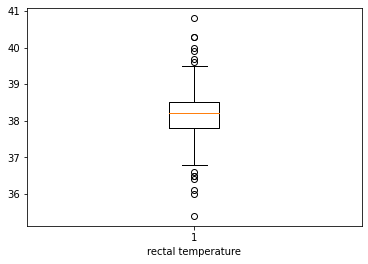

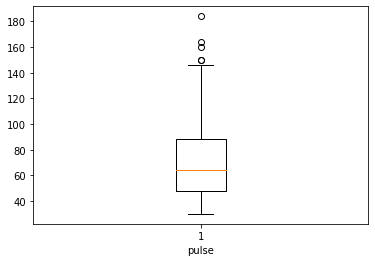

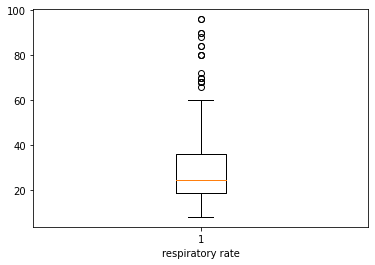

In [12]:
#визуально определим наличие выбросов с помощью boxplot
columns = ['rectal temperature', 'pulse', 'respiratory rate']
for column in columns:
    plt.boxplot(x = (df_horse_reserch[column][~df_horse_reserch[column].isna()])) 
    plt.xlabel(df_horse_reserch[column].name)
    plt.show()

Исходя из графиков видим, что выбросы есть во всех 3 измеряемых показателях. 
1. В уровне температуры, статистически, показания отмечены, как выбросы. Вместе с тем, показания около 35,4 и 40,8 являются допустимыми значениями измерямой температуры. С ними ничего делать не будем 
2. В измерениях пульса тоже заметны статистические выбросы. Из описания столбца видим, что повышенные значения могут быть при высоком показатели боли. Посмотрим на значения пульса > 140 отдельно
3. Видим большое кол-во выбросов > 60 . Также посмотрим вместе с остальными значениями для поиска зависимости 

In [13]:
df_horse_reserch.query('pulse > 140')

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
3,1.0,9,39.1,164.0,84.0,4.0,2.0,2.0
39,1.0,9,39.2,146.0,96.0,NaN,NaN,2.0
41,2.0,9,39.0,150.0,72.0,NaN,NaN,1.0
55,1.0,9,38.6,160.0,20.0,3.0,3.0,2.0
255,1.0,9,38.8,184.0,84.0,1.0,4.0,2.0
275,1.0,9,38.8,150.0,50.0,1.0,5.0,2.0


Все строки, где пульс > 140 - строки с некорректно заполненным возрастом (9).
Проверим дополнительно строки с возрастом 9

In [14]:
df_horse_reserch.query('Age == 9')

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
3,1.0,9,39.1,164.0,84.0,4.0,2.0,2.0
9,2.0,9,38.3,90.0,NaN,1.0,5.0,1.0
13,2.0,9,38.0,92.0,28.0,1.0,1.0,2.0
16,1.0,9,NaN,128.0,36.0,3.0,4.0,2.0
23,1.0,9,38.3,130.0,60.0,NaN,2.0,1.0
39,1.0,9,39.2,146.0,96.0,NaN,NaN,2.0
41,2.0,9,39.0,150.0,72.0,NaN,NaN,1.0
55,1.0,9,38.6,160.0,20.0,3.0,3.0,2.0
74,1.0,9,NaN,NaN,NaN,NaN,NaN,2.0
75,1.0,9,39.7,100.0,NaN,3.0,2.0,3.0


Визуально нет какой-то зависимости между возрастом 9 и остальными столбцами

In [15]:
#посмотрим на выбросы частоты дыхания > 60
df_horse_reserch[df_horse_reserch['respiratory rate'] > 60]

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
3,1.0,9,39.1,164.0,84.0,4.0,2.0,2.0
39,1.0,9,39.2,146.0,96.0,NaN,NaN,2.0
41,2.0,9,39.0,150.0,72.0,NaN,NaN,1.0
82,1.0,9,38.1,100.0,80.0,3.0,3.0,1.0
84,1.0,1,37.8,60.0,80.0,1.0,2.0,1.0
103,1.0,9,38.0,140.0,68.0,1.0,3.0,1.0
106,1.0,1,38.3,52.0,96.0,NaN,NaN,1.0
120,1.0,1,39.4,54.0,66.0,1.0,2.0,1.0
125,1.0,1,38.0,42.0,68.0,4.0,3.0,1.0
186,1.0,1,39.3,64.0,90.0,2.0,NaN,1.0


# Задание 3. Работа с пропусками
Рассчитать количество пропусков для всех выбранных столбцов. Принять и обосновать решение о методе заполнения пропусков по каждому столбцу на основе рассчитанных статистик и возможной взаимосвязи значений в них. Сформировать датафрейм, в котором пропуски будут отсутствовать.

In [16]:
#посчитаем % пропусков по строкам 
(df_horse_reserch.isna().mean() * 100).round(2)

surgery?                       0.33
Age                            0.00
rectal temperature            20.00
pulse                          8.00
respiratory rate              19.33
temperature of extremities    18.67
pain                          18.33
outcome                        0.33
dtype: float64

In [17]:
# Посчитаем кол-во значений по каждой категории возраста
df_horse_reserch['Age'].value_counts()

1    276
9     24
Name: Age, dtype: int64

In [18]:
# Посмотрим, сколько строк у нас заполнено больше чем на половину. 
# df_horse_reserch.dropna(thresh = len(df_horse_reserch.columns) / 2).info()
# Удалим эти строки черезз инплейс. 
df_horse_reserch.dropna(thresh = len(df_horse_reserch.columns) / 2, inplace = True)
# Также, осталась 1 строка с НаН в столбце операции. Удалим и ее
df_horse_reserch = df_horse_reserch.dropna(axis = 0, subset = ['surgery?'])
df_horse_reserch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 291 entries, 0 to 299
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   surgery?                    291 non-null    float64
 1   Age                         291 non-null    int64  
 2   rectal temperature          239 non-null    float64
 3   pulse                       275 non-null    float64
 4   respiratory rate            241 non-null    float64
 5   temperature of extremities  243 non-null    float64
 6   pain                        244 non-null    float64
 7   outcome                     291 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 20.5 KB


D:\python a\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [19]:
df_horse_reserch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 291 entries, 0 to 299
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   surgery?                    291 non-null    float64
 1   Age                         291 non-null    int64  
 2   rectal temperature          239 non-null    float64
 3   pulse                       275 non-null    float64
 4   respiratory rate            241 non-null    float64
 5   temperature of extremities  243 non-null    float64
 6   pain                        244 non-null    float64
 7   outcome                     291 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 20.5 KB


In [20]:
df_horse_reserch.isna().sum()

surgery?                       0
Age                            0
rectal temperature            52
pulse                         16
respiratory rate              50
temperature of extremities    48
pain                          47
outcome                        0
dtype: int64

In [21]:
# df_horse_reserch.dropna().info()
# Если удалить все строки с пустыми значениями, то теряем половину ДФ - слишком большие потери. Будем заменять пустые значения

Начнем заполнение с температуры. 

Так как в температуре мы посчитали, что выбросов нет и стд маленькое - будем заполнять средней величиной.

Сгруппируем по тому, была ли операция

In [22]:
print(df_horse_reserch.groupby(['surgery?'])['rectal temperature'].mean())
print('_______________________________________')
print(df_horse_reserch.groupby(['surgery?','pain'])['rectal temperature'].mean())

surgery?
1.0    38.143571
2.0    38.204040
Name: rectal temperature, dtype: float64
_______________________________________
surgery?  pain
1.0       1.0     38.087500
          2.0     38.432143
          3.0     38.024324
          4.0     37.945455
          5.0     38.094737
2.0       1.0     38.096429
          2.0     38.477273
          3.0     38.212000
          4.0     37.866667
          5.0     38.500000
Name: rectal temperature, dtype: float64


Нет зависимости от того, была ли операция и не прослеживается зависимости температуры от уровня боли. 

У нас есть показатель temperature of extremities. Обратимся к нему 

In [23]:
print(df_horse_reserch.groupby(['temperature of extremities'])['rectal temperature'].mean())

temperature of extremities
1.0    38.126389
2.0    38.203846
3.0    38.189873
4.0    38.455000
Name: rectal temperature, dtype: float64


В описании к ДФ говорится, что горячие конечности должны коррелировать с высокой ректальной температурой.

Но средние показатели температуры говорят об обратном 

В любом случае, заполним пустые значения на основании среднего значения по группировке по температуре конечностей, как самым близким показателем

In [24]:
df_horse_reserch['rectal temperature'].fillna(df_horse_reserch.groupby(['temperature of extremities'])['rectal temperature'].transform('mean'), inplace = True)

In [25]:
df_horse_reserch.isna().sum()
df_horse_reserch[df_horse_reserch['rectal temperature'].isna()]

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
87,2.0,1,NaN,40.0,16.0,NaN,NaN,3.0
96,2.0,1,NaN,84.0,36.0,NaN,NaN,1.0
160,1.0,1,NaN,NaN,NaN,NaN,4.0,1.0
169,1.0,1,NaN,65.0,24.0,NaN,5.0,3.0
177,1.0,1,NaN,68.0,14.0,NaN,4.0,2.0
274,1.0,1,NaN,76.0,NaN,NaN,NaN,3.0


Оставшиеся значения по ректальной температуре заполним новой средней. 

Пустые значения по температуре конечностей заполним модой, так как это качественный показатель

Есть значения с возрастом лошади (9). Уточнить наличие и причину возникновения данных значений необходимо у владельца ДФ. 
Так как нет иных значений, кроме 1 и 9, можем предположить, что это ошибка передачи данных и следует поставить категорию 2

Пульс лошадей зависит от уровня боли. Заполним пропуски медианой (так как есть выбросы по пульсу) по группировке по уровню боли и посмотрим на оставшиеся значения

In [39]:
df_horse_reserch['rectal temperature'].fillna(df_horse_reserch['rectal temperature'].mean(), inplace = True)
df_horse_reserch['temperature of extremities'].fillna(df_horse_reserch['temperature of extremities'].mode()[0], inplace = True)
df_horse_reserch['Age'].replace(9, 2, inplace = True)
df_horse_reserch['pulse'].fillna(df_horse_reserch.groupby(['pain'])['pulse'].transform('median'), inplace = True)

In [28]:
# Мы исказили данные по уровню боли, но попробуем сгруппировать по нему ДФ и посмотреть на медианные значения по частоте дыхания 
print(df_horse_reserch.groupby(['pain'])['respiratory rate'].median())

pain
1.0    20.0
2.0    32.0
3.0    24.0
4.0    30.0
5.0    30.0
Name: respiratory rate, dtype: float64


Нет никакой прямой зависимости. 
Так как не хотим сильно искажать данные, заполним пустые занчения медианными

In [30]:
df_horse_reserch['respiratory rate'].fillna(df_horse_reserch['respiratory rate'].median(), inplace = True)

In [31]:
df_horse_reserch.isna().sum()

surgery?                       0
Age                            0
rectal temperature             0
pulse                          0
respiratory rate               0
temperature of extremities     0
pain                          47
outcome                        0
dtype: int64

При условии, что данные уже искажены, а корреляции между данными нет: есть два пути. 
1. Удалить строки с пропусками по уровню боли 
2. Заполнить модой 

Удалим данные. Мы пожертвуем 6-ой частью ДФ, вместе с тем сохраним "чистоту" данных 

In [33]:
df_horse_reserch = df_horse_reserch.dropna(axis = 0, subset = ['pain'])
df_horse_reserch.isna().sum()

surgery?                      0
Age                           0
rectal temperature            0
pulse                         0
respiratory rate              0
temperature of extremities    0
pain                          0
outcome                       0
dtype: int64

In [40]:
df_horse_reserch.describe()

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,1.413934,1.069672,38.180743,72.819672,28.643443,2.381148,2.946721,1.553279
std,0.493549,0.255117,0.662133,27.625067,14.197023,1.013394,1.308892,0.732287
min,1.000000,1.000000,35.400000,36.000000,8.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,37.900000,50.000000,20.000000,1.000000,2.000000,1.000000
50%,1.000000,1.000000,38.189873,66.000000,25.000000,3.000000,3.000000,1.000000
75%,2.000000,1.000000,38.500000,88.000000,34.250000,3.000000,4.000000,2.000000
max,2.000000,2.000000,40.800000,184.000000,88.000000,4.000000,5.000000,3.000000
